In [149]:
import os
save_folder = "Desktop/E90/data/"  # Corrected path
triple_tag_estimation_path = "/home/hojune/Desktop/E90/data/triple_tag_estimations.csv"

# triple_tag_estimation_path = os.path.join(absolute_path, "triple_tag_estimations_with_dist.csv")

# Print relevant paths
print("Triple tag estimation path: ", triple_tag_estimation_path)

Triple tag estimation path:  /home/hojune/Desktop/E90/data/triple_tag_estimations.csv


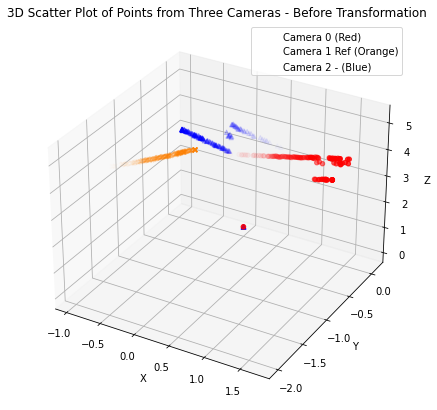

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data from the provided dataset
triple_data = pd.read_csv(triple_tag_estimation_path)

# Extract relevant columns
frame_numbers = triple_data["Frame"]

x_cam0_new = triple_data["x_cam0_new"]
y_cam0_new = triple_data["y_cam0_new"]
z_cam0_new = triple_data["z_cam0_new"]

x_cam1_new = triple_data["x_cam1_new"]
y_cam1_new = triple_data["y_cam1_new"]
z_cam1_new = triple_data["z_cam1_new"]

x_cam2_new = triple_data["x_cam2_new"]
y_cam2_new = triple_data["y_cam2_new"]
z_cam2_new = triple_data["z_cam2_new"]

x_cam0 = triple_data["x_cam0"]
y_cam0 = triple_data["y_cam0"]
z_cam0 = triple_data["z_cam0"]

x_cam1 = triple_data["x_cam1"]
y_cam1 = triple_data["y_cam1"]
z_cam1 = triple_data["z_cam1"]

x_cam2 = triple_data["x_cam2"]
y_cam2 = triple_data["y_cam2"]
z_cam2 = triple_data["z_cam2"]

# Normalize time for color mapping
num_frames = len(frame_numbers)
colors_cam0 = [(1, 0, 0, i / num_frames) for i in range(num_frames)]  # Redish, lighter to darker
colors_cam1 = [(1, 0.5, 0, i / num_frames) for i in range(num_frames)]  # Orangeish, lighter to darker
colors_cam2 = [(0, 0, 1, i / num_frames) for i in range(num_frames)]  # Blueish, lighter to darker

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter points for Camera 0 (redish)
ax.scatter(x_cam0, y_cam0, z_cam0, c=colors_cam0, label="Camera 0 (Red)", marker="o")

# Scatter points for Camera 1 (orange)
ax.scatter(x_cam1, y_cam1, z_cam1, c=colors_cam1, label="Camera 1 Ref (Orange)", marker="x")

# Scatter points for Camera 1 (blueish)
ax.scatter(x_cam2, y_cam2, z_cam2, c=colors_cam2, label="Camera 2 - (Blue)", marker="^")

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot of Points from Three Cameras - Before Transformation")

# Show legend
ax.legend()

# Display the plot
plt.show()


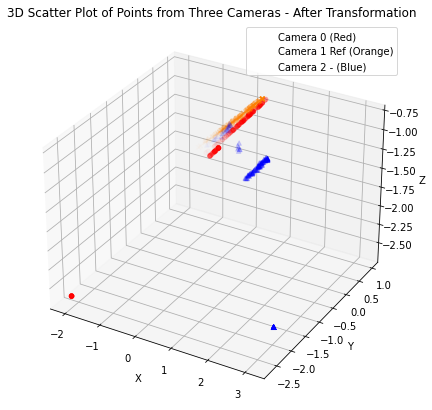

In [151]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter points for Camera 0 (redish)
ax.scatter(x_cam0_new, y_cam0_new, z_cam0_new, c=colors_cam0, label="Camera 0 (Red)", marker="o")

# Scatter points for Camera 1 (orange)
ax.scatter(x_cam1_new, y_cam1_new, z_cam1_new, c=colors_cam1, label="Camera 1 Ref (Orange)", marker="x")

# Scatter points for Camera 1 (blueish)
ax.scatter(x_cam2_new, y_cam2_new, z_cam2_new, c=colors_cam2, label="Camera 2 - (Blue)", marker="^")

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot of Points from Three Cameras - After Transformation")

# Show legend
ax.legend()

# Display the plot
plt.show()

In [152]:
# Calculate average distance between the points
def average_dist(points1, points2):
    distance = np.mean(np.linalg.norm(points1 - points2, axis=1))
    # return distance upt0 four decimal places
    return round(distance, 4)

print("=========================Before=========================")
print("Average distance between the cam2 and cam1: ",average_dist(np.array([x_cam2, y_cam2, z_cam2]).T, np.array([x_cam1, y_cam1, z_cam1]).T),"m")
print("Average distance between the cam0 and cam1: ",average_dist(np.array([x_cam0, y_cam0, z_cam0]).T, np.array([x_cam1, y_cam1, z_cam1]).T),"m")
print("Average distance between the cam0 and cam2: ",average_dist(np.array([x_cam0, y_cam0, z_cam0]).T, np.array([x_cam2, y_cam2, z_cam2]).T),"m") 


print("=========================After=========================")
print("Average distance between the cam2_new and cam1_new: ",average_dist(np.array([x_cam2_new, y_cam2_new, z_cam2_new]).T, np.array([x_cam1_new, y_cam1_new, z_cam1_new]).T),"m")
print("Average distance between the cam0_new and cam1_new: ",average_dist(np.array([x_cam0_new, y_cam0_new, z_cam0_new]).T, np.array([x_cam1_new, y_cam1_new, z_cam1_new]).T),"m")
print("Average distance between the cam0_new and cam2_new: ",average_dist(np.array([x_cam0_new, y_cam0_new, z_cam0_new]).T, np.array([x_cam2_new, y_cam2_new, z_cam2_new]).T),"m")

=========================Before=========================
Average distance between the cam2 and cam1:  2.0222 m
Average distance between the cam0 and cam1:  1.938 m
Average distance between the cam0 and cam2:  2.103 m
=========================After=========================
Average distance between the cam2_new and cam1_new:  1.2021 m
Average distance between the cam0_new and cam1_new:  0.5453 m
Average distance between the cam0_new and cam2_new:  1.327 m
